In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.linspace(1, 10, 100)
print(x)

[ 1.          1.09090909  1.18181818  1.27272727  1.36363636  1.45454545
  1.54545455  1.63636364  1.72727273  1.81818182  1.90909091  2.
  2.09090909  2.18181818  2.27272727  2.36363636  2.45454545  2.54545455
  2.63636364  2.72727273  2.81818182  2.90909091  3.          3.09090909
  3.18181818  3.27272727  3.36363636  3.45454545  3.54545455  3.63636364
  3.72727273  3.81818182  3.90909091  4.          4.09090909  4.18181818
  4.27272727  4.36363636  4.45454545  4.54545455  4.63636364  4.72727273
  4.81818182  4.90909091  5.          5.09090909  5.18181818  5.27272727
  5.36363636  5.45454545  5.54545455  5.63636364  5.72727273  5.81818182
  5.90909091  6.          6.09090909  6.18181818  6.27272727  6.36363636
  6.45454545  6.54545455  6.63636364  6.72727273  6.81818182  6.90909091
  7.          7.09090909  7.18181818  7.27272727  7.36363636  7.45454545
  7.54545455  7.63636364  7.72727273  7.81818182  7.90909091  8.
  8.09090909  8.18181818  8.27272727  8.36363636  8.45454545  8.545

In [4]:
theta = np.deg2rad(45)
print(theta)

0.7853981633974483


In [5]:
# 투사체 궤적
v = 10
g = 9.8
theta = np.deg2rad(45)

time = np.linspace(0, 2, 101)
x_location = v*np.cos(theta)*time
y_location = -1/2*g*(time**2) + v*np.sin(theta)*time

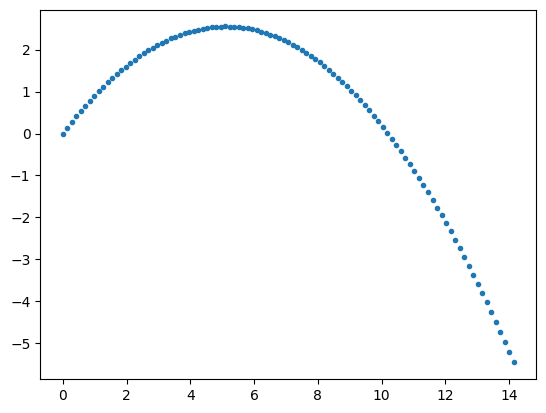

In [6]:
plt.plot(x_location, y_location, '.')

In [7]:
# 투사체 궤적에 노이즈 추가 
sigma = 0.5
x_location = v*np.cos(theta)*time + np.random.normal(0, sigma, time.shape)
y_location = -1/2*g*(time**2) + v*np.sin(theta)*time + np.random.normal(0, sigma, time.shape)

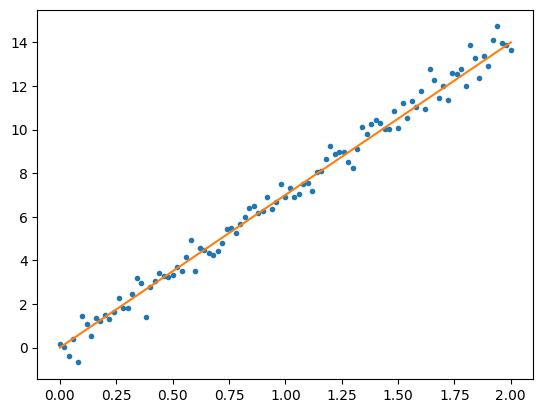

In [8]:
temp_a = 7
temp_x0 = 0
plt.plot(time, x_location, '.')

temp_time = np.linspace(0, 2, 101);
xx = temp_a*temp_time + temp_x0

plt.plot(temp_time, xx, '-');

In [9]:
## 필요 함수들
def x_theory(temp_time, temp_a, temp_x0):
    return temp_a*temp_time + temp_x0

def y_theory(temp_time, g, vy, y0):
    return -0.5*g*(temp_time**2) + vy*temp_time + y0

def err2(pred, data):
    return ((pred-data)**2).sum()

def err1(pred, data):
    return np.abs(pred-data).sum()

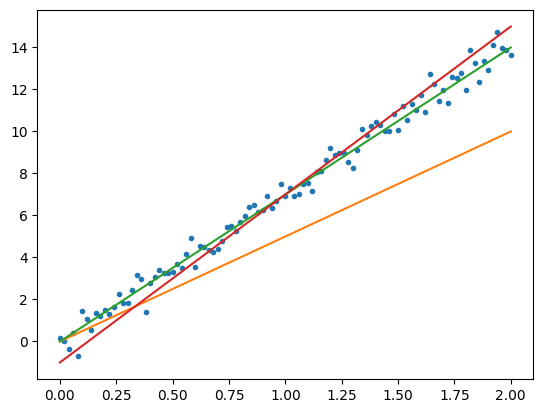

In [10]:
plt.plot(time, x_location, '.');
plt.plot(time, x_theory(time, 5, 0), '-');
plt.plot(time, x_theory(time, 7, 0), '-');
plt.plot(time, x_theory(time, 8, -1), '-');

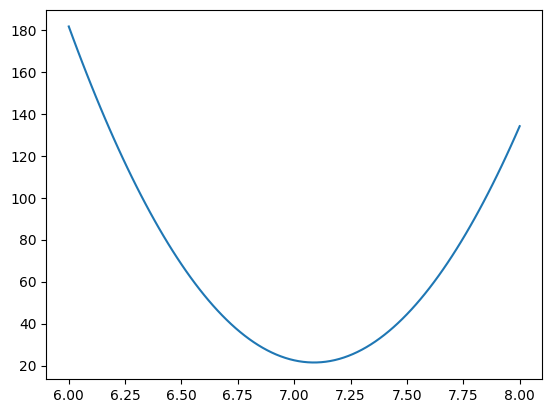

In [11]:
## error 시각화 

err2_list = []
time_new = np.linspace(6, 8, 101)
for point in time_new:
    err2s = err2(x_theory(time, point, temp_x0), x_location)
    err2_list.append(err2s)

plt.plot(time_new, err2_list)

#### gradient 구해서 linear fitting

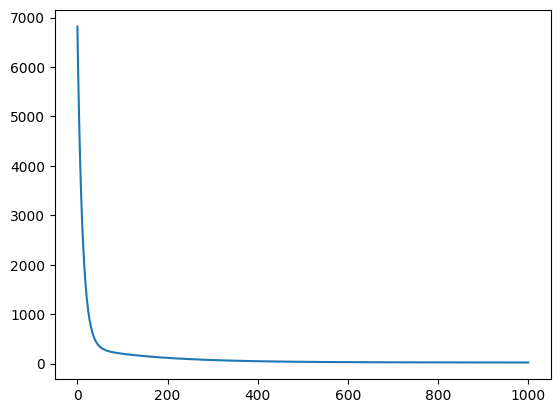

In [ ]:
## ex) pred_fucntion: 2a, real_value: x_location // lossfunction: (2a-10)**2

a = 0
b = 0
lr = 1e-4

errs = []
aa = []
bb = []

err_new = err2(x_theory(time, a, b), x_location)
errs.append(err_new)
aa.append(a)
bb.append(b)

for i in range(1000):
    a -= (2*lr*(x_theory(time, a, b) - x_location)*time).sum()
    b -= (2*lr*(x_theory(time, a, b) - x_location)*1).sum()
    err_new = err2(x_theory(time, a, b), x_location)
    errs.append(err_new)
    aa.append(a)
    bb.append(b)

plt.plot(errs)